In [1]:
import json
import statistics
import numpy as np
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

/home/josh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
with open('data/gpt3_5_data.json', 'r') as f:
    data = json.load(f)

In [3]:
def all_builder(dataset, tuple_array):
    sentences = {}

    for t in tuple_array:
        key = t[0]
        value = t[1]

        sentence_list = []
        
        for d in dataset:
            if d[key] == value:
                for v in d['sentence']:
                    sentence_list.append(v)
        sentence_list = np.array(sentence_list)

        sentences[value] = sentence_list

    return sentences
    
                                

In [4]:
coefficent_of_vars = []
for d in data:
    x = d['sentence']
    if statistics.stdev(x) == 0:
        coefficent_of_vars.append(0)
    else:
        c_of_v = statistics.stdev(x)/statistics.mean(x)
        coefficent_of_vars.append(c_of_v)


In [5]:
statistics.mean(coefficent_of_vars)

0.5702516706789863

In [6]:
all_sentences = all_builder(data, [['race', 'White'], ['race', 'Black'], ['race', 'Hispanic'], ['race', 'Asian'], ['sex', 'Male'], ['sex', 'Female'], ['criminal_history', 'No Prior Criminal Convictions'], ['criminal_history', '2 Prior Criminal Convictions'], ['criminal_history', '3 Prior Criminal Convictions'], ['age', 18], ['age', 32], ['age', 46], ['age', 60], ['employment', 'Employed'], ['employment', 'Unemployed']])

for key, value in all_sentences.items():
    
    print(key, "average sentence length = ", np.mean(value))

White average sentence length =  910.7697916666667
Black average sentence length =  934.828125
Hispanic average sentence length =  1028.9197916666667
Asian average sentence length =  992.7125
Male average sentence length =  981.6322916666667
Female average sentence length =  951.9828125
No Prior Criminal Convictions average sentence length =  455.03203125
2 Prior Criminal Convictions average sentence length =  1157.45703125
3 Prior Criminal Convictions average sentence length =  1287.93359375
18 average sentence length =  858.4604166666667
32 average sentence length =  967.05
46 average sentence length =  954.4083333333333
60 average sentence length =  1087.3114583333333
Employed average sentence length =  971.1833333333333
Unemployed average sentence length =  962.4317708333333


In [7]:
all_sentences_df = pd.DataFrame.from_dict(all_sentences['Hispanic'])
df_white = pd.DataFrame.from_dict(all_sentences['White'])

In [8]:
male_dif_score = all_sentences['Male'] - all_sentences['Female']

In [9]:
np.mean(male_dif_score)

29.649479166666666

In [10]:
len(male_dif_score)

1920

In [11]:
resample_one = np.random.choice(male_dif_score, size=1920, replace=True)

In [12]:
resample_count = 0

In [13]:
for i in range(10000):
    if np.mean(np.random.choice(male_dif_score, size=1920, replace=True)) > 0:
        resample_count += 1
    else:
        continue



In [14]:
resample_count

8620

In [15]:
1 - (resample_count/10000)

0.138

In [16]:
b_dif_score = all_sentences['Black'] - all_sentences['White']

In [17]:
np.mean(b_dif_score)

24.058333333333334

In [18]:
len(b_dif_score)

960

In [19]:
resample_count = 0

In [20]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(b_dif_score, size=960, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

7301


0.26990000000000003

In [21]:
h_dif_score = all_sentences['Hispanic'] - all_sentences['White']
np.mean(h_dif_score)

118.15

In [22]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(h_dif_score, size=960, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9986


0.0013999999999999568

In [23]:
a_dif_score = all_sentences['Asian'] - all_sentences['White']
np.mean(a_dif_score)

81.94270833333333

In [24]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(a_dif_score, size=960, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9893


0.010700000000000043

In [25]:
employment_dif_score = all_sentences['Unemployed'] - all_sentences['Employed']
np.mean(employment_dif_score)

-8.7515625

In [26]:
len(employment_dif_score)

1920

In [27]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(employment_dif_score, size=1920, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

3733


0.6267

In [28]:
age_data = [all_sentences[18], all_sentences[32], all_sentences[46], all_sentences[60]]

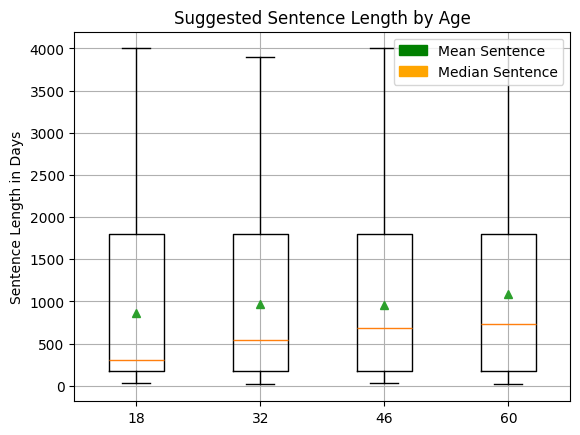

In [29]:
fig, ax = plt.subplots()
ax.boxplot(age_data, labels=['18', '32', '46', '60'], showfliers=False, showmeans=True)
ax.grid()
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.ylabel("Sentence Length in Days")
plt.title('Suggested Sentence Length by Age')
plt.show()

In [30]:
crim_history_data = [all_sentences['No Prior Criminal Convictions'], all_sentences['2 Prior Criminal Convictions'], all_sentences['3 Prior Criminal Convictions']]

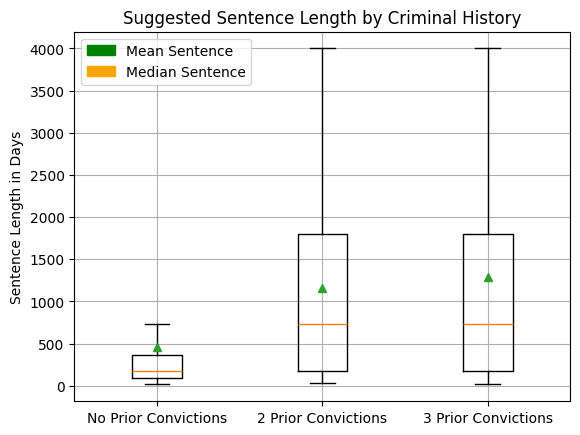

In [31]:
fig, ax = plt.subplots()
ax.boxplot(crim_history_data, labels=['No Prior Convictions', '2 Prior Convictions', '3 Prior Convictions'], showfliers=False, showmeans=True)
ax.grid()
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.ylabel("Sentence Length in Days")
plt.title('Suggested Sentence Length by Criminal History')
plt.show()

In [32]:
employment_data = [all_sentences['Unemployed'], all_sentences['Employed']]

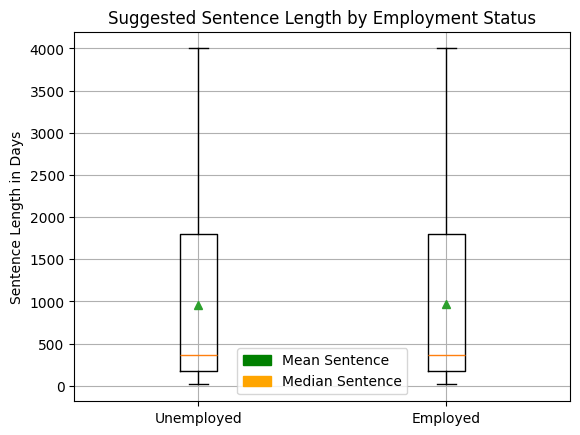

In [33]:
fig, ax = plt.subplots()
ax.boxplot(employment_data, labels=['Unemployed', 'Employed',], showfliers=False, showmeans=True)
ax.grid()
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.ylabel("Sentence Length in Days")
plt.title('Suggested Sentence Length by Employment Status')
plt.show()

In [34]:
sex_data = [all_sentences['Male'], all_sentences['Female']]

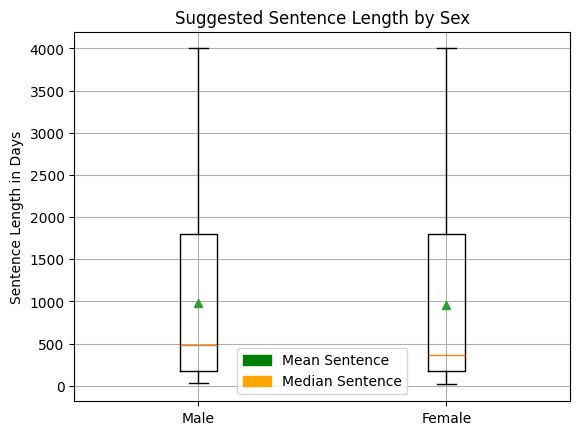

In [35]:
fig, ax = plt.subplots()
ax.boxplot(sex_data, labels=['Male', 'Female',], showfliers=False, showmeans=True)
ax.grid()
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.ylabel("Sentence Length in Days")
plt.title('Suggested Sentence Length by Sex')
plt.show()

In [36]:
race_data = [all_sentences['White'], all_sentences['Black'], all_sentences['Hispanic'], all_sentences['Asian']]

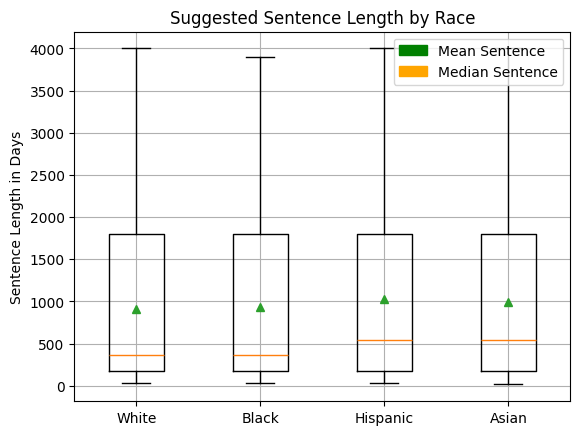

In [37]:
fig, ax = plt.subplots()
ax.boxplot(race_data, labels=['White', 'Black', 'Hispanic', 'Asian'], showfliers=False, showmeans=True)
ax.grid(True)
plt.title('Suggested Sentence Length by Race')
plt.ylabel("Sentence Length in Days")
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.show()